In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.auto_vs_human.paranlu_auto import roberta_specialized_automatic, roberta_specialized, deberta_v3, deberta_v3_automatic

%load_ext autoreload
%autoreload 2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 22180.77it/s]


In [17]:
def plot_isocurves(ax: matplotlib.axes.Axes):
    
    # plot the isocurves
    bernoullis = np.linspace(0, 1, 1000)
    total_variance = bernoullis * (1-bernoullis)
    
    pove_percentages = [i / 10 for i in range(10)]
    palette = sns.color_palette("flare", len(pove_percentages)) #crest
    
    for i, pove in enumerate(pove_percentages):
        min_pstay = 1 - 2*((1-pove)*total_variance) # 2 * UV, but max is when all variance is UV
        ax.plot(bernoullis, min_pstay, '--', alpha=0.3, color=palette[i])
        annotation_point = 860
        curve_text = f"{100 - int(100 * pove)}% PVAP" if pove > 0 else "Min P(STAY)"
        ax.annotate(
            curve_text, 
            (bernoullis[annotation_point], min_pstay[annotation_point]+ 0.005), 
            rotation=20, 
            horizontalalignment='center', 
            verticalalignment='center', 
            alpha=0.3, 
            color='black',
            fontsize=8
        )

Model: roberta


Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


########################################




Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\U0001faa3' [U+1faa3], substituting with a dummy symbol.


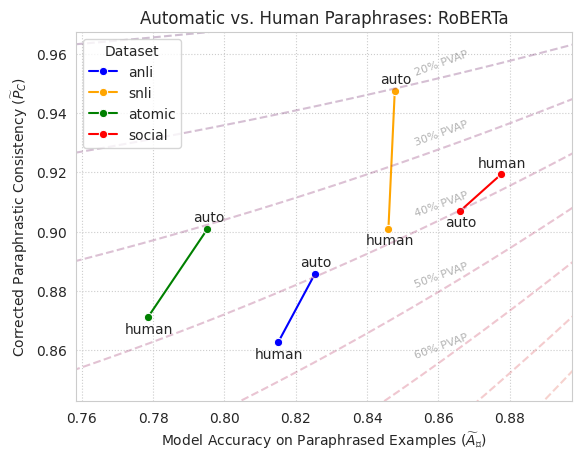

In [18]:
from simple_colors import * 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid", {'grid.linestyle': ':'})

auto_vs_human_results = {
    'roberta': {
        'human': roberta_specialized,
        'auto': roberta_specialized_automatic
    },
    # 'deberta': {
    #     'human': deberta_v3,
    #     'auto': deberta_v3_automatic
    # }
}

for model, auto_v_human in auto_vs_human_results.items():
    print('Model:', model)

    auto = auto_v_human['auto']
    human = auto_v_human['human']

    colors = ['blue', 'orange', 'green', 'red']
    legend_labels = []

    min_x, max_x = 100, 0
    min_y, max_y = 100, 0
    
    for i, (data_split, auto_analysis) in enumerate(auto.items()):
        dataset = data_split.split('-')[0]
        
        human_linguistic_robustness = human[f'{dataset}-human'].linguistic_robustness_summary(human[f'{dataset}-test'])
        auto_linguistic_robustness = auto_analysis.linguistic_robustness_summary(human[f'{dataset}-test'])

        x = [human_linguistic_robustness['paraphrase_accuracy_corrected'], auto_linguistic_robustness['paraphrase_accuracy_corrected']]
        y = [human_linguistic_robustness['stay_prob_corrected'], auto_linguistic_robustness['stay_prob_corrected']]

        min_x, max_x = min(min_x, min(x)), max(max_x, max(x))
        min_y, max_y = min(min_y, min(y)), max(max_y, max(y))

        if min(x) < min_x:
            min_x = min(x)

        if min(y) < min_y:
            min_y = min(y)
        
        source = ['human', 'auto']
        legend_labels.append(dataset)
        sns.lineplot(x=x, y=y, color=colors[i], marker='o', label=dataset)

        for pt in range(len(x)):
            va = 'top' if pt == 0 else 'bottom'
            y_offset = -0.002 if pt == 0 else 0.001

            if dataset == 'social':
                va = 'bottom' if pt == 0 else 'top'
                y_offset = 0.001 if pt == 0 else -0.002
            
            
            plt.annotate(source[pt], (x[pt], y[pt] + y_offset), textcoords="offset points", xytext=(x[pt], y[pt]), ha='center', va=va)
    
    ax = plt.gca()
    plot_isocurves(ax)
    plt.xlim(min_x - 0.02, max_x + 0.02)  # set x-axis limits from -2 to 2
    plt.ylim(min_y - 0.02, max_y + 0.02)
    print('########################################\n\n')
    plt.legend(title='Dataset', loc='upper left')
    plt.xlabel("Model Accuracy on Paraphrased Examples ($\widetilde{A}_{🪣}$)")
    plt.ylabel(r"Corrected Paraphrastic Consistency ($\widetilde{P}_C$)")
    plt.title(f'Automatic vs. Human Paraphrases: RoBERTa')
    plt.savefig(f'auto_vs_human_{model}.pdf')
    plt.show()